# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from IPython.core.interactiveshell import InteractiveShell
from warnings import filterwarnings
%matplotlib inline
InteractiveShell.ast_node_interactivity = 'all'
filterwarnings('ignore')

feature = iris.feature_names

data = pd.DataFrame(X, columns=feature)
data['class'] = y

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

Text(0.5, 1.0, 'ward')

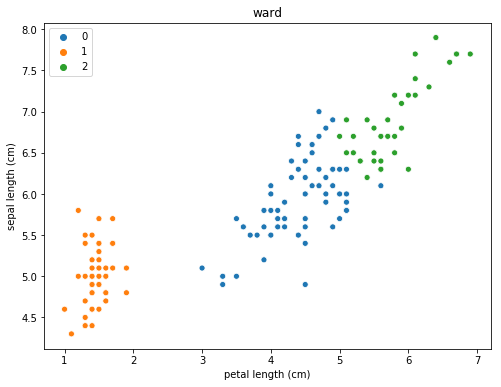

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

Text(0.5, 1.0, 'complete')

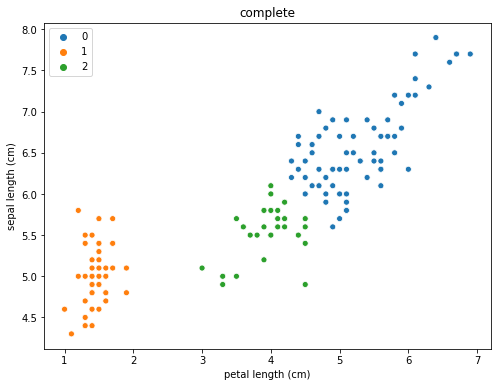

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

Text(0.5, 1.0, 'average')

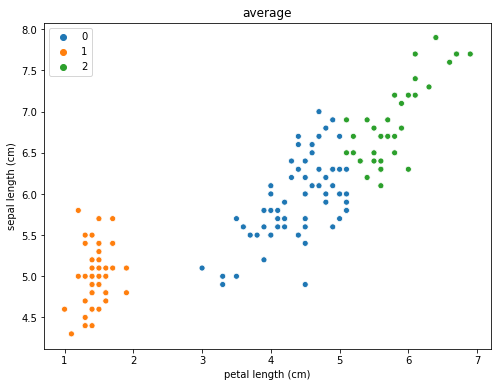

In [5]:
import seaborn as sns

# 定義分類器

estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

# 分類並畫圖
fignum = 1
titles = ['ward', 'complete', 'average']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8,6))
    est.fit(X)
    labels = est.labels_
    plt.title(titles[fignum-1])
    sns.scatterplot('petal length (cm)', 'sepal length (cm)', hue=labels, data=data, palette=sns.color_palette(n_colors=3))
    plt.show()
    fignum+=1

Text(0.5, 1.0, 'Ground Truth')

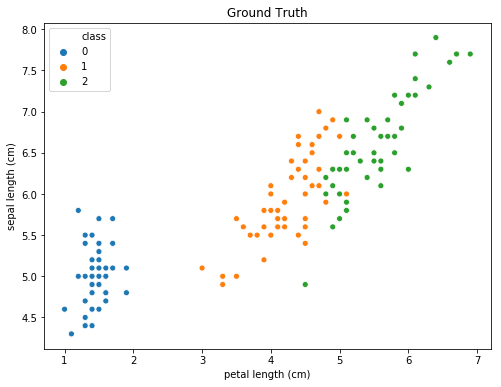

In [6]:
# Ground Truth

fig = plt.figure(figsize=(8, 6))
plt.title('Ground Truth')
sns.scatterplot('petal length (cm)', 'sepal length (cm)', hue='class', data=data, palette=sns.color_palette(n_colors=3))